In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
df.shape

(1338, 7)

In [25]:
df1 = pd.get_dummies(df,drop_first=True,dtype=int)
df1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [27]:
X = df1.drop('charges',axis=1)
y = df1['charges']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

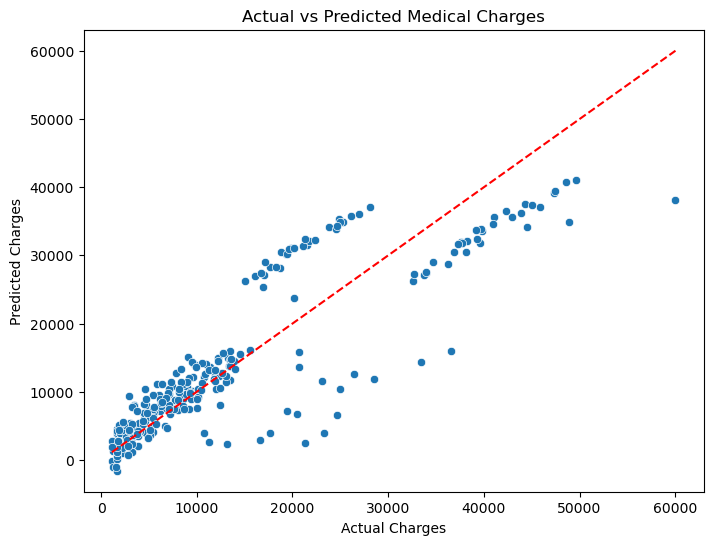

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Medical Charges')
plt.show()


In [31]:
#coefficient of x i.e c in y=mx+c
model.intercept_

-11190.390651132178

In [32]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [33]:
print("R² Score:", r2)
print("Mean Squared Error:", mse)

R² Score: 0.7660252638317872
Mean Squared Error: 36862294.82316192


### now normalizing the columns

In [36]:
df2 = df1.copy()
df2.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2[['age', 'bmi', 'charges']] = scaler.fit_transform(df[['age', 'bmi', 'charges']])

In [39]:
df2.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,0,0.298584,0,1,0,0,1
1,-1.509965,0.509621,1,-0.953689,1,0,0,1,0
2,-0.797954,0.383307,3,-0.728675,1,0,0,1,0
3,-0.441948,-1.305531,0,0.719843,1,0,1,0,0
4,-0.513149,-0.292556,0,-0.776802,1,0,1,0,0


In [45]:
X = df2.drop('charges', axis=1)
y = df2['charges']


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)


In [50]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [52]:
print("R² Score:", r2)
print("Mean Squared Error:", mse)

R² Score: 0.7660252638317874
Mean Squared Error: 0.2515463281142907


### THE MSE is decreased compared to with out normalization

### saving model using pickle

In [53]:
import pickle
with open('linear_regression_model.pkl','wb') as file:
    pickle.dump(model,file)

In [54]:
with open('linear_regression_model.pkl','rb') as f:
    model = pickle.load(f)


In [55]:
print("Intercept : ",model.intercept_)

Intercept :  -0.4165424205443551


In [56]:
print("coefficients : ",model.coef_)

coefficients :  [ 0.30287589  0.1508087   0.04260081  0.0101241   1.98635024 -0.02619809
 -0.06417823 -0.06856042]


In [57]:
# Assuming X was your feature matrix before splitting
feature_names = X.columns
for name, coef in zip(feature_names, model.coef_):
    print(f"{name}: {coef}")


age: 0.3028758906361837
bmi: 0.1508087002038776
children: 0.0426008067351652
sex_male: 0.010124099755964535
smoker_yes: 1.9863502354864606
region_northwest: -0.026198093266363597
region_southeast: -0.06417822571761775
region_southwest: -0.06856042343270104
